In [1]:
import sys
sys.path.append('..')

In [2]:
from __future__ import print_function
import os

import numpy as np
import matplotlib.pyplot as plt

from utils import nsfg, thinkstats2, thinkplot

In [3]:
data_dir = os.getcwd() + "/../data/"
resp = nsfg.ReadFemResp(dct_file=data_dir + "2002FemResp.dct", dat_file=data_dir + "2002FemResp.dat.gz")

In [4]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


## Question 1

In [5]:
resp["hieduc"].unique()

array([ 6, 10,  9,  5, 12, 11,  8, 13, 14,  7, 15])

In [6]:
school = resp.loc[resp["hieduc"] < 11]
university = resp.loc[resp["hieduc"] > 10]

In [7]:
print(school["hieduc"].unique())
print(university["hieduc"].unique())

[ 6 10  9  5  8  7]
[12 11 13 14 15]


The descriptive statistics given below are meaningless since "agemomb1" is a encoded as a categorical variable. To interpret "agemomb" see [link](https://www.icpsr.umich.edu/icpsradmin/nsfg/variable/619576?studyNumber=9998&vg=7371).

In [8]:
school["agemomb1"].describe()

count    5498.000000
mean        3.827210
std        10.677571
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        96.000000
Name: agemomb1, dtype: float64

In [9]:
university["agemomb1"].describe()

count    2145.000000
mean        4.379021
std        11.142874
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        96.000000
Name: agemomb1, dtype: float64

A descriptive statistics for categorical variables could be value counts

In [10]:
school["agemomb1"].value_counts()

3     2044
2     1189
1     1152
4      737
5      304
96      72
Name: agemomb1, dtype: int64

In [11]:
university["agemomb1"].value_counts()

3     973
4     455
2     344
1     180
5     162
96     31
Name: agemomb1, dtype: int64

## Question 2

Since column for PDF and CDF are not specified, used column "agemomb1"

In [12]:
school_pmf = thinkstats2.Pmf(school["agemomb1"], label='school')
university_pmf = thinkstats2.Pmf(university["agemomb1"], label='university')

print(school_pmf)
print(university_pmf)

Pmf({96: 0.0130956711531466, 1: 0.2095307384503456, 2: 0.21626045834849036, 3: 0.3717715532921062, 4: 0.13404874499818115, 5: 0.05529283375773009})
Pmf({96: 0.014452214452214451, 1: 0.08391608391608392, 2: 0.16037296037296037, 3: 0.4536130536130536, 4: 0.21212121212121213, 5: 0.07552447552447553})


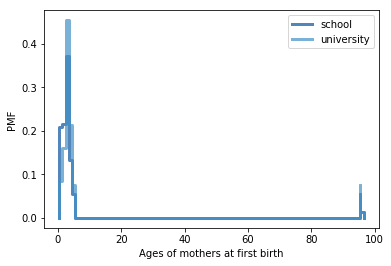

In [13]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([school_pmf, university_pmf])
thinkplot.Config(xlabel='Ages of mothers at first birth', ylabel='PMF')

In [14]:
school_cdf = thinkstats2.Cdf(school["agemomb1"], label='school')
university_cdf = thinkstats2.Cdf(university["agemomb1"], label='university')

print(school_cdf)
print(university_cdf)

Cdf([ 1  2  3  4  5 96], [0.20953074 0.4257912  0.79756275 0.9316115  0.98690433 1.        ])
Cdf([ 1  2  3  4  5 96], [0.08391608 0.24428904 0.6979021  0.91002331 0.98554779 1.        ])


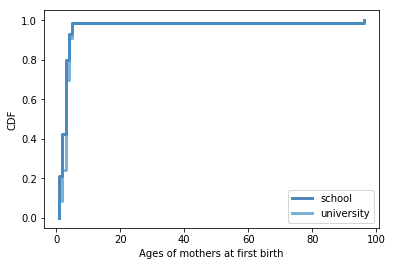

In [15]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([school_cdf, university_cdf])
thinkplot.Config(xlabel='Ages of mothers at first birth', ylabel='CDF')

## Question 3

In [16]:
ages = school["agemomb1"].unique()
diffs = []
for age in ages:
    p1 = school_pmf.Prob(age)
    p2 = university_pmf.Prob(age)
    diff = (p1 - p2)
    diffs.append(diff)

print(ages)
print(diffs)

[ 2  4  3  1  5 96]
[0.05588749797553, -0.07807246712303098, -0.08184150032094739, 0.12561465453426168, -0.02023164176674544, -0.001356543299067852]


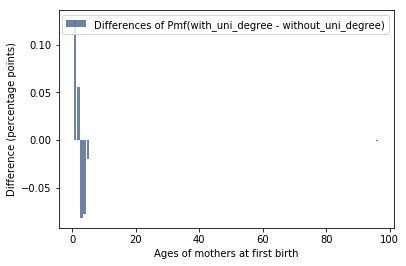

In [17]:
thinkplot.Bar(ages, diffs, label="Differences of Pmf(with_uni_degree - without_uni_degree)")
thinkplot.Config(xlabel='Ages of mothers at first birth', ylabel='Difference (percentage points)')

## Question 4

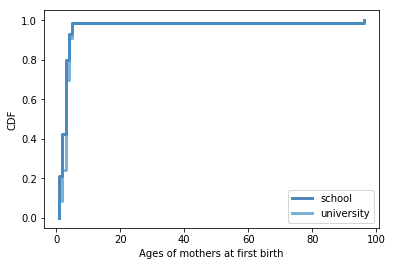

In [18]:
# Copy-paste of code above
school_cdf = thinkstats2.Cdf(school["agemomb1"], label='school')
university_cdf = thinkstats2.Cdf(university["agemomb1"], label='university')

thinkplot.PrePlot(2)
thinkplot.Cdfs([school_cdf, university_cdf])
thinkplot.Config(xlabel='Ages of mothers at first birth', ylabel='CDF')

Used 1 since it represent less than 18 years

In [19]:
print(school_cdf.Prob(1))
print(university_cdf.Prob(1))

0.2095307384503456
0.08391608391608392


In [20]:
length = len(school["agemomb1"])
ranks = school["agemomb1"].sort_values().rank().unique()

print(school["agemomb1"].unique())
print(ranks)

[ 2  4  3  1  5 96]
[ 576.5 1747.  3363.5 4754.  5274.5 5462.5]


In [21]:
find_percentile = lambda inx: ranks[inx]/length*100

In [22]:
print("Considering respondents without university degree, first {} percentile includes mothers who gave first birth when they are younger than 18.".format(find_percentile(1)))

Considering respondents without university degree, first 31.7751909785 percentile includes mothers who gave first birth when they are younger than 18.


In [23]:
print("Considering respondents without university degree, from {} to {} percentile includes mothers who gave first birth when they are 18 and older than 18.".format(find_percentile(1), find_percentile(5)))

Considering respondents without university degree, from 31.7751909785 to 99.3543106584 percentile includes mothers who gave first birth when they are 18 and older than 18.


In [24]:
length = len(university["agemomb1"])
ranks = university["agemomb1"].sort_values().rank().unique()

print(university["agemomb1"].unique())
print(ranks)

[ 3  2  5  1  4 96]
[  90.5  352.5 1011.  1725.  2033.5 2130. ]


In [25]:
print("Considering respondents with university degree, first {} percentile includes mothers who gave first birth when they are younger than 18.".format(find_percentile(1)))

Considering respondents with university degree, first 16.4335664336 percentile includes mothers who gave first birth when they are younger than 18.


In [26]:
print("Considering respondents with university degree, from {} to {} percentile includes mothers who gave first birth when they are 18 and older than 18.".format(find_percentile(1), find_percentile(5)))

Considering respondents with university degree, from 16.4335664336 to 99.3006993007 percentile includes mothers who gave first birth when they are 18 and older than 18.


## Question 5

In [27]:
resp.dtypes

caseid               int64
rscrinf              int64
rdormres             int64
rostscrn             int64
rscreenhisp          int64
rscreenrace        float64
age_a                int64
age_r                int64
cmbirth              int64
agescrn              int64
marstat              int64
fmarstat           float64
fmarit               int64
evrmarry             int64
hisp                 int64
hispgrp            float64
numrace              int64
roscnt               int64
hplocale           float64
manrel             float64
fl_rage              int64
fl_rrace             int64
fl_rhisp             int64
goschol              int64
vaca               float64
higrade              int64
compgrd            float64
havedip            float64
dipged             float64
cmhsgrad           float64
                    ...   
advice_i             int64
insem_i              int64
invitro_i            int64
endomet_i            int64
fibroids_i           int64
pidtreat_i           int64
e

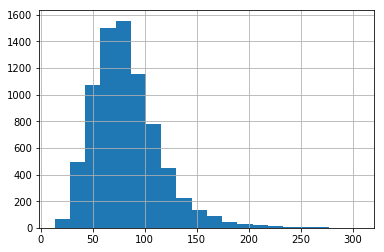

In [28]:
resp["intvlngth"].hist(bins=20)

"intvlngth" has a binomial distribution.

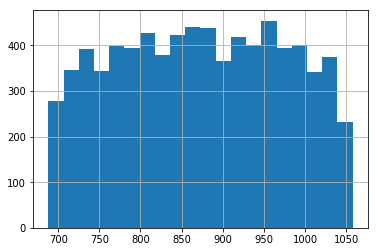

In [29]:
resp["cmbirth"].hist(bins=20)

"cmbirth" has a uniform distribution.